In [28]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob

In [29]:
train_path = r'C:\Users\yagiz\Desktop\pythonla_alakali_hersey\datasets\fruits-360_dataset\fruits-360\Training\\'
test_path = r"C:\Users\yagiz\Desktop\pythonla_alakali_hersey\datasets\fruits-360_dataset\fruits-360\Test\\"


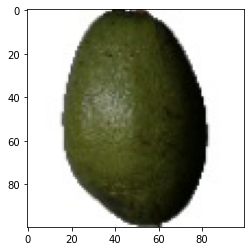

In [30]:
img = load_img(train_path + r"Avocado\0_100.jpg" )
plt.imshow(img)
plt.show()


In [22]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [23]:
number_of_class = len(glob(train_path + r"\*"))
print(number_of_class)

131


In [32]:
vgg = VGG16()

In [34]:
print(vgg.summary())
print(type(vgg))

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
vgg_layer_list = vgg.layers 
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x00000261F466ACD0>, <keras.layers.convolutional.Conv2D object at 0x00000261F466A640>, <keras.layers.convolutional.Conv2D object at 0x00000261F4631BB0>, <keras.layers.pooling.MaxPooling2D object at 0x00000261F466AC40>, <keras.layers.convolutional.Conv2D object at 0x00000261F464B5B0>, <keras.layers.convolutional.Conv2D object at 0x00000261F464B430>, <keras.layers.pooling.MaxPooling2D object at 0x00000261F464B340>, <keras.layers.convolutional.Conv2D object at 0x00000261F46286A0>, <keras.layers.convolutional.Conv2D object at 0x00000261F4628940>, <keras.layers.convolutional.Conv2D object at 0x00000261F4602FD0>, <keras.layers.pooling.MaxPooling2D object at 0x00000261F4665D90>, <keras.layers.convolutional.Conv2D object at 0x00000261F45E8760>, <keras.layers.convolutional.Conv2D object at 0x00000261F45E88B0>, <keras.layers.convolutional.Conv2D object at 0x00000261F4614910>, <keras.layers.pooling.MaxPooling2D object at 0x00000261F45E8FD0>, <keras.

In [36]:
model = Sequential()
for layer in range(len(vgg_layer_list) - 1):
    model.add(vgg_layer_list[layer])

In [37]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [38]:
for layer in model.layers:
    layer.trainable = False

model.add(Dense(number_of_class, activation="softmax"))

In [39]:
model.compile(loss = "categorical_crossentropy",
                optimizer = "rmsprop",
                metrics = ["accuracy"])

In [42]:
train_data = ImageDataGenerator().flow_from_directory(train_path, target_size = (224, 224))
test_data = ImageDataGenerator().flow_from_directory(test_path, target_size = (224, 224))
batch_size = 32

history = model.fit_generator(train_data, steps_per_epoch=1600//batch_size,
                            epochs=25,
                            validation_data = test_data,
                            validation_steps = 800//batch_size)

KeyboardInterrupt: 